In [2]:
import numpy as np
import pandas as pd

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import pyarrow.parquet as pq


In [91]:
def fk(x):
    if int(x[:2])==1:
        return int(x[3:5])
    elif int(x[:2])==2:
        return (31 + int(x[3:5]))
    elif int(x[:2])==3:
        return (58 + int(x[3:5]))

In [3]:
training = pd.read_csv('final')

In [4]:
training.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
training.head()

,userid,date,referrer_url,current_url,page_type,product_price,cart_amount,sessionid,search_words,old_product_price,...,productid,datefixed,day_name,day_num,week_num,month_num,year_num,date2,datefixed2,giris/hafta
0,0000a8811d309d99bf87ec6680d38fe9,1,1,1,1,0,1,1,0,0,...,0,1,1,1,1,1,1,1,1,0.120690
1,0001b5ef1ffaaac0fe452500cc588e8f,13,13,13,13,4,13,13,0,4,...,4,13,13,13,13,13,13,13,13,0.120690
2,0001da844668450707f57217271faeb0,3,3,3,3,0,3,3,0,0,...,0,3,3,3,3,3,3,3,3,0.362069
3,00026f0193aeaa73d3b01467110e25ac,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0.120690
4,000274bfd3306ab0c85b3813b21df110,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0.120690


In [ ]:
2020-03-05

In [6]:
def f(x):
    if x>=1:
        return 1
    else:
        return x

In [7]:
training['giris/hafta'] = training['giris/hafta'].apply(f)

In [8]:
training.drop(['datefixed', 'day_name', 'day_num', 'week_num', 'month_num', 'year_num',
       'date2', 'datefixed2'],axis=1, inplace=True)

In [9]:
training[['referrer_url','current_url','page_type','cart_amount','sessionid']].head()

,referrer_url,current_url,page_type,cart_amount,sessionid
0,1,1,1,1,1
1,13,13,13,13,13
2,3,3,3,3,3
3,1,1,1,1,1
4,1,1,1,1,1


In [10]:
training.drop(['referrer_url','current_url','page_type','cart_amount'], axis=1, inplace=True)

In [11]:
training=training.set_index('userid')

In [13]:
training.head()

,date,product_price,sessionid,search_words,old_product_price,product_category,page_category,productid,giris/hafta
userid,,,,,,,,,
0000a8811d309d99bf87ec6680d38fe9,1,0,1,0,0,0,0,0,0.120690
0001b5ef1ffaaac0fe452500cc588e8f,13,4,13,0,4,4,9,4,0.120690
0001da844668450707f57217271faeb0,3,0,3,0,0,0,2,0,0.362069
00026f0193aeaa73d3b01467110e25ac,1,1,1,0,1,1,0,1,0.120690
000274bfd3306ab0c85b3813b21df110,1,1,1,0,1,1,0,1,0.120690


In [16]:
test = pq.read_table('test.snappy.parquet').to_pandas()

In [21]:
test['date2']=test['date'].apply(lambda x: x[:10])

In [23]:
test.head()

,userid,sessionid,date,referrer_url,current_url,page_type,product_price,cart_amount,search_words,old_product_price,product_category,page_category,productid,date2
0,2b8467d8dffc4f420052ae3feddf0d4a,78a441abe18f03758ccfa1a65d055841,2020-03-21 02:03:50,fb79c9fb058c55d599b2c67a9cfe8d48,9d206cbddfddaa97c20690adcd6ea802,main,NaN,0.0,None,NaN,None,None,None,2020-03-21
1,23b916225b742ba69265f64fa2032144,8569057a87f6c616dfdac8ff35d47cb0,2020-03-21 02:57:09,3d66a2183ccd73b86b7c9c9ba7ec82dd,e195aa19f28bc7835aa1a0bf295df2f1,category,NaN,0.0,None,NaN,None,[6A4D46B89EBF7FCEED0CC74F00B89D64],None,2020-03-21
2,09c847566aa9ca324f8d1c69d9414d74,d651eb8518bda8419433ce3e4f61a438,2020-03-21 02:22:08,4f8def2167aee81e50396674500e7367,e4c3c725ffb3f969c09d87183d8a93c8,category,NaN,0.0,None,NaN,None,[EB45EC8149B8EAE211DD8BEDD560E92B],None,2020-03-21
3,f5aa585b5ad1a7fd379ab2c53aa290fd,4b2300dd511376005fc181aa0fa468d4,2020-03-21 02:03:57,578c597f8ce51200403b82e51cfc9068,48ecb7b9e785b27ebe7b63206c17f6a1,category,NaN,0.0,None,NaN,None,[EB45EC8149B8EAE211DD8BEDD560E92B],None,2020-03-21
4,ef59b2a5757c58c8586e700671d8fceb,76d9d05c6e02a6838dc0782964ef0277,2020-03-21 02:48:58,68b449ca794ec705f46e84a40220b95a,d3876b2130f29300382c95b09795e130,productDetail,0.0,0.0,None,NaN,"[53D8DE583EA7608B24D2AAF0EDD90F0B, AF6DCDAE76F...",None,[B7F434265A96817CA35645F2CC763216],2020-03-21


In [55]:
data = test.groupby(['userid','sessionid']).count()

In [56]:
data.drop(['referrer_url','current_url','page_type','cart_amount'], axis=1, inplace=True)

In [64]:
data = data.rename(columns={'date':'click'})

In [71]:
sesdat = test[['sessionid','date']]

In [74]:
sesdat = sesdat.groupby('sessionid').min()

In [83]:
data = data.reset_index()

In [86]:
data = data.merge(sesdat, on=['sessionid'])

In [87]:
data.head()

,userid,sessionid,click,product_price,search_words,old_product_price,product_category,page_category,productid,date2,date
0,00063ecc40f771db0b75c0361eb3f89e,24e3e2754f51bdd0e227b1b894c0e43d,2,1,0,1,1,1,1,2,2020-03-05 10:50:28
1,00082bf66a336417ebb6cb9f8258e734,38ff19506fddfa851817520c9fe13401,28,11,0,10,11,8,17,28,2020-03-21 06:23:44
2,000fe5813f2498ac29934caa0ff2a158,0a8caf116c3036eb5f9051581d74cbf7,4,1,0,1,1,1,1,4,2020-03-11 07:20:23
3,0010154b1cbbdcf276e96f4e7adea94d,424cf4f877de1ccaba8146b8d22421fe,13,1,0,1,1,10,1,13,2020-03-05 00:26:41
4,0010d0501c7638beb76fdd106d34e6b6,f339cbb653daa4b7ccc1b36b6d7eeb6b,4,2,0,2,2,2,2,4,2020-03-02 07:25:39


In [89]:
data['date']=data['date'].apply(lambda x: x[:10])

In [90]:
data.head()

,userid,sessionid,click,product_price,search_words,old_product_price,product_category,page_category,productid,date2,date
0,00063ecc40f771db0b75c0361eb3f89e,24e3e2754f51bdd0e227b1b894c0e43d,2,1,0,1,1,1,1,2,2020-03-05
1,00082bf66a336417ebb6cb9f8258e734,38ff19506fddfa851817520c9fe13401,28,11,0,10,11,8,17,28,2020-03-21
2,000fe5813f2498ac29934caa0ff2a158,0a8caf116c3036eb5f9051581d74cbf7,4,1,0,1,1,1,1,4,2020-03-11
3,0010154b1cbbdcf276e96f4e7adea94d,424cf4f877de1ccaba8146b8d22421fe,13,1,0,1,1,10,1,13,2020-03-05
4,0010d0501c7638beb76fdd106d34e6b6,f339cbb653daa4b7ccc1b36b6d7eeb6b,4,2,0,2,2,2,2,4,2020-03-02


In [92]:
data.drop('date2', axis=1, inplace=True)

In [97]:
data['date2']=data['date'].apply(lambda x: x[5:])

In [100]:
data['date2']=data['date2'].apply(fk)

In [102]:
data.sort_values('date')

,userid,sessionid,click,product_price,search_words,old_product_price,product_category,page_category,productid,date,date2
10653,4d4c0f2557772cdf178677e7a54f0016,113bce9c1c6d8cb340f361ea477743ac,11,1,0,1,1,7,1,2020-03-01,59
27496,c8948676c59c5e169aa10cb2a0971b1e,e0fdfe23fa17a8293aa718b22b686efc,3,0,0,0,0,0,0,2020-03-01,59
2330,10faa5bba1fd2d6f0c1d4d5bc17c66a2,140345ef6bd6a5816b0e1070b20294d3,2,1,0,1,1,1,1,2020-03-01,59
28493,cf6d1612baf327ca4a72e9cada9e17f7,1609124436f62d10f4dfd7041176c296,1,0,0,0,0,1,0,2020-03-01,59
14718,6a7c82c49126d9cfaf6ea775e8b6cbf4,ba4029861a721c14ade642f35136bd8d,3,1,0,1,1,2,1,2020-03-01,59
5092,24f1bdd6022219b81e227831bad18eba,f968d231c793672cba7e70c6ce8a2ad2,1,1,0,1,1,0,1,2020-03-01,59
10273,4a7789baa269b463bf13c115b8d1bf38,c336e58db1b6a45463117d67236c6d5b,3,0,0,0,0,1,0,2020-03-01,59
19893,9078395dafcdf17fdd6a76d14d93b6c7,f911a02178c97974ff2ffb5c682e693d,3,1,0,1,1,1,1,2020-03-01,59
27495,c8932d7ea7fe8dd13f148e7e37a69501,7f4cc409bab0caa55c0f5a9479dec9e7,2,1,0,1,1,1,1,2020-03-01,59
2344,1112fb775fece86de4f7abb3e66ca0fd,4b2c2ca26902d80b3de78f156a5959e9,1,1,0,1,1,0,1,2020-03-01,59


In [108]:
data['count'] = 1

In [119]:
data.groupby('userid').sum()

1

In [116]:
data['userid'].nunique()

35163

In [120]:
data['sessionid'].nunique()

35090

In [124]:
len(pd.read_csv('samplesubmissionson.csv'))

35163

In [35]:
x = test[['userid','sessionid','date2']]

In [38]:
len(x)

177589

In [ ]:
x = 

In [125]:
x = x.drop_duplicates()

In [129]:
x['count'] = 1

In [132]:
merger = pd.DataFrame(x.groupby('userid')['count'].sum())

In [135]:
merger = merger.reset_index()

In [137]:
test = data.merge(merger, on='userid')

In [138]:
test.drop('count_x', axis=1, inplace=True)

In [142]:
test = test.rename(columns={'count_y':'frequency'})

In [145]:
test.head()

,userid,sessionid,click,product_price,search_words,old_product_price,product_category,page_category,productid,date,date2,frequency
0,00063ecc40f771db0b75c0361eb3f89e,24e3e2754f51bdd0e227b1b894c0e43d,2,1,0,1,1,1,1,2020-03-05,63,1
1,00082bf66a336417ebb6cb9f8258e734,38ff19506fddfa851817520c9fe13401,28,11,0,10,11,8,17,2020-03-21,79,1
2,000fe5813f2498ac29934caa0ff2a158,0a8caf116c3036eb5f9051581d74cbf7,4,1,0,1,1,1,1,2020-03-11,69,1
3,0010154b1cbbdcf276e96f4e7adea94d,424cf4f877de1ccaba8146b8d22421fe,13,1,0,1,1,10,1,2020-03-05,63,1
4,0010d0501c7638beb76fdd106d34e6b6,f339cbb653daa4b7ccc1b36b6d7eeb6b,4,2,0,2,2,2,2,2020-03-02,60,2


In [146]:
test[test['frequency']!=1]

,userid,sessionid,click,product_price,search_words,old_product_price,product_category,page_category,productid,date,date2,frequency
4,0010d0501c7638beb76fdd106d34e6b6,f339cbb653daa4b7ccc1b36b6d7eeb6b,4,2,0,2,2,2,2,2020-03-02,60,2
33,003617ea42933d835908db4c048a0555,a90e4dc62f15a7a5491f65b6a91d6b5b,60,26,0,26,26,12,32,2020-03-20,78,2
70,007d8a7eded03151193da756d3e5e8ef,2c7784fb94c4c21211cef4e519d3a2b3,6,0,0,0,0,5,0,2020-03-20,78,2
75,00896203064917b99f2cfcf8ccc4d11b,6cc2321db679cc7d1ec77b7d04f0dcc4,8,3,0,3,3,2,3,2020-03-01,59,2
99,00add0cfdadd671625165a25034b1fbe,f3a412995b178eca23926a85b725e153,4,0,0,0,0,2,0,2020-03-08,66,4
134,00edf1fdee1d71368f86ebb49b0c669e,fed8b3e8e2b9a789123143c204a52b6e,5,4,0,4,4,1,4,2020-03-01,59,3
155,01179fd3b7d3cedeee0ee02d50b0d683,ea833738c85ab3e3a0f759a35814f567,127,29,14,28,29,79,29,2020-03-20,78,2
192,01650710e843259e5e70d219e9fd7bb4,14cde128308dc0435f60da56a7e1be83,12,3,0,2,3,3,6,2020-03-21,79,2
210,0198766bcde9b981870510b800665953,7d6055f58dc3205ebe0305ce864d2010,9,2,0,2,2,7,2,2020-03-05,63,2
225,01a9923382a9c98cdd09057664bec089,c4fe486cf4bf361d7bb1c08fdb6e4b2b,46,8,2,7,8,20,15,2020-03-01,59,3


In [148]:
test['wreq']=test['frequency']/31

In [149]:
test['date2'].min()

59

In [150]:
test['date2'].max()

89

In [158]:
def week_f(x,y):
    if x>=83:
        y = y*4
    elif x>=75:
        y = y*3
    elif x>=67:
        y=y*2
    else:
        y = y
      
    return y

In [159]:
test['x'] = test.apply(lambda test:week_f(test['date2'],test['wreq']), axis=1)

In [165]:
real_fr = pd.DataFrame(test.groupby('userid')['x'].sum())

In [167]:
real_fr = real_fr.reset_index()

In [172]:
real_fr['real freq']=real_fr['x']*7

In [173]:
real_fr.drop('y', axis=1, inplace=True)

In [180]:
test = test.merge(real_fr, on='userid')

In [183]:
test.drop(['x_x','x_y'],axis=1, inplace=True)

In [186]:
test = test.set_index(['userid','sessionid'])

In [188]:
ts = test.drop(['date','date2','frequency','wreq'], axis=1)

In [214]:
np.mean(ts['real freq'])

0.5093119325391027

In [218]:
def f2(x):
    if x>=0.5:
        x=1
    else:
        x=x
    return x

In [221]:
ts['real freq']=ts['real freq'].apply(f2)

In [243]:
def f3(x):
    if x>=0.39:
        x=1
    else:
        x=0
    return x

In [224]:
ts['real freq']=ts['real freq'].apply(f3)

In [225]:
ts.head()

,,click,product_price,search_words,old_product_price,product_category,page_category,productid,real freq
userid,sessionid,,,,,,,,
00063ecc40f771db0b75c0361eb3f89e,24e3e2754f51bdd0e227b1b894c0e43d,2,1,0,1,1,1,1,0
00082bf66a336417ebb6cb9f8258e734,38ff19506fddfa851817520c9fe13401,28,11,0,10,11,8,17,1
000fe5813f2498ac29934caa0ff2a158,0a8caf116c3036eb5f9051581d74cbf7,4,1,0,1,1,1,1,0
0010154b1cbbdcf276e96f4e7adea94d,424cf4f877de1ccaba8146b8d22421fe,13,1,0,1,1,10,1,0
0010d0501c7638beb76fdd106d34e6b6,f339cbb653daa4b7ccc1b36b6d7eeb6b,4,2,0,2,2,2,2,0


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


In [226]:
X = ts.drop('real freq', axis=1).values
y = ts['real freq'].values

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [228]:
scaler = MinMaxScaler()


In [229]:
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [230]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [232]:
X_train.shape


(28130, 7)

In [233]:
md = Sequential()

md.add(Dense(units=7, activation='relu'))
md.add(Dropout(0.5))

#md.add(Dense(units=10, activation='relu'))
#md.add(Dropout(0.5))

md.add(Dense(units=3, activation='relu'))
md.add(Dropout(0.5))


md.add(Dense(units=1, activation='sigmoid'))

md.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [234]:
md.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6893 - accuracy: 0.5473 - val_loss: 0.6888 - val_accuracy: 0.5464
Epoch 2/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6885 - accuracy: 0.5486 - val_loss: 0.6887 - val_accuracy: 0.5464
Epoch 3/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6883 - accuracy: 0.5487 - val_loss: 0.6886 - val_accuracy: 0.5464
Epoch 4/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6882 - accuracy: 0.5486 - val_loss: 0.6886 - val_accuracy: 0.5464
Epoch 5/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6880 - accuracy: 0.5487 - val_loss: 0.6884 - val_accuracy: 0.5464
Epoch 6/600
880/880 [==============================] - 1s 983us/step - loss: 0.6879 - accuracy: 0.5487 - val_loss: 0.6883 - val_accuracy: 0.5464
Epoch 7/600
880/880 [==============================] - 1s 1ms/step - loss: 0.6880 - accuracy: 0.5487 - val_loss: 0.6881 - val_accuracy: 0.54

In [236]:
predictions = md.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [237]:
val = np.array([y_test]).T

In [238]:
err = abs(predictions-val)

In [239]:
dt = np.concatenate([1-predictions, 1-val,err], axis=1)

In [240]:
last = pd.DataFrame(dt, columns=['True Values', 'Predictions', 'Error'])

In [241]:
last.head()

,True Values,Predictions,Error
0,1,1,0
1,1,0,1
2,1,1,0
3,1,0,1
4,1,1,0


In [242]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71      3843
           1       0.68      0.02      0.03      3190

    accuracy                           0.55      7033
   macro avg       0.62      0.51      0.37      7033
weighted avg       0.61      0.55      0.40      7033



In [207]:
np.mean(last[last['True Values']>=0.5]['Error'])

0.2562960800927174

In [208]:
np.mean(last[last['True Values']<0.5]['Error'])

0.2357153387075121

In [209]:
np.mean(last['Error'])

0.2370731467556766

In [100]:
import seaborn as sns

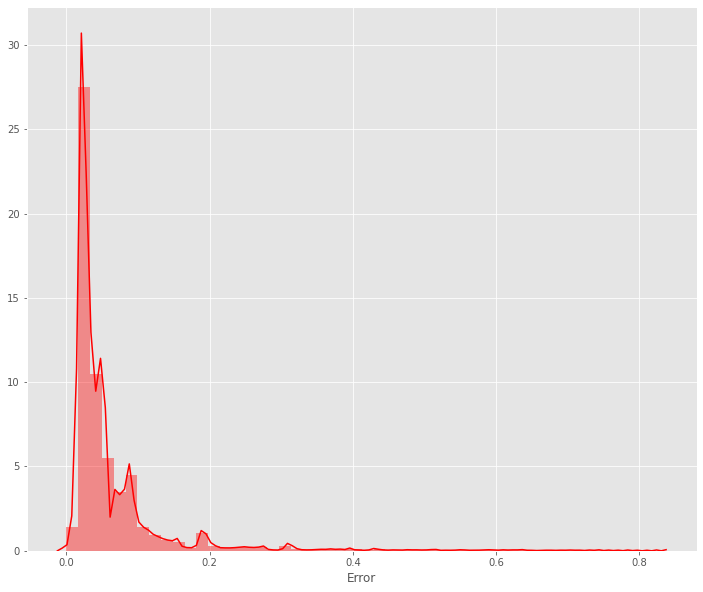

In [120]:
plt.figure(figsize=(12,10))
sns.distplot(last['Error'], color='Red')

In [128]:
predictions = pd.read_csv('pred.csv')

In [129]:
predictions.head()

,Unnamed: 0,userid,prediction
0,0,9d4246ea40f6cef9759921848d8b3b3c,0.838050
1,1,36dcc9dc99e01872518e00de9f688060,0.334108
2,2,9f93d6b7d323d802c8d1b749937b509e,0.920518
3,3,9a2a50cfa0bde8e9b8c324afd01eed17,0.921444
4,4,dcaa64309d2fcb07fd1294d1fcf0396f,0.920518


In [130]:
predictions.drop('Unnamed: 0', axis=1, inplace=True)

In [133]:
predictions.to_csv(r'C:\Users\90538\Desktop\dac-insider-project\predictions.csv', index=False)

In [188]:
sb = pd.read_csv('predictions.csv')

In [190]:
def f2(x):
    if x>=0.60:
        return 1
    else:
        return 0

In [189]:
sb.head()

,userid,prediction
0,9d4246ea40f6cef9759921848d8b3b3c,0.838050
1,36dcc9dc99e01872518e00de9f688060,0.334108
2,9f93d6b7d323d802c8d1b749937b509e,0.920518
3,9a2a50cfa0bde8e9b8c324afd01eed17,0.921444
4,dcaa64309d2fcb07fd1294d1fcf0396f,0.920518


In [192]:
sb['prediction']=sb['prediction'].apply(f2)

In [194]:
sb['prediction']=sb['prediction'].apply(lambda x: np.uint64(x))

In [197]:
sb.to_csv(r'C:\Users\90538\Desktop\prlast.csv', index=False)

In [204]:
np.dtype(pd.read_csv(r'C:\Users\90538\Desktop\prlast.csv')['prediction'])

dtype('int64')

In [205]:
np.dtype(pd.read_csv('samplesubmissionson.csv')['prediction'])

dtype('int64')

In [201]:
sb

,userid,prediction
0,9d4246ea40f6cef9759921848d8b3b3c,1
1,36dcc9dc99e01872518e00de9f688060,0
2,9f93d6b7d323d802c8d1b749937b509e,1
3,9a2a50cfa0bde8e9b8c324afd01eed17,1
4,dcaa64309d2fcb07fd1294d1fcf0396f,1
5,ed80226d0a1912ef46ad98a7fe373003,1
6,a7bb9ddc27f14234df490efd5d1e3cea,0
7,d55cb64cc2d5b13d33fe34e9d0af12b6,1
8,474b55e47282a6d488af04b18afad3e7,1
9,30c373f1e0626c9623548527b03b6474,1


In [199]:
np.dtype(pd.read_csv(r'C:\Users\90538\Desktop\prlast.csv')['prediction'])

dtype('int64')

In [ ]:
pd.val

In [154]:
sb.to_csv(r'C:\Users\90538\Desktop\predictionssub.csv', index=False)

In [156]:
pd.read_csv(r'C:\Users\90538\Desktop\predictionssub.csv')

,userid,prediction
0,9d4246ea40f6cef9759921848d8b3b3c,1
1,36dcc9dc99e01872518e00de9f688060,0
2,9f93d6b7d323d802c8d1b749937b509e,1
3,9a2a50cfa0bde8e9b8c324afd01eed17,1
4,dcaa64309d2fcb07fd1294d1fcf0396f,1
5,ed80226d0a1912ef46ad98a7fe373003,1
6,a7bb9ddc27f14234df490efd5d1e3cea,0
7,d55cb64cc2d5b13d33fe34e9d0af12b6,1
8,474b55e47282a6d488af04b18afad3e7,1
9,30c373f1e0626c9623548527b03b6474,1


In [163]:
rand= np.random.randint(0,2,35163)

In [166]:
sb['prediction'] = rand

In [168]:
sb.to_csv(r'C:\Users\90538\Desktop\ab1.csv', index=False)

In [172]:
np.dtype(sb['prediction'])

dtype('int32')

In [179]:
ds = pd.read_csv('samplesubmissionson.csv')

In [175]:
sb.shape

(35163, 2)

In [185]:
sb['prediction']=sb['prediction'].apply(lambda x: np.uint64(x))

In [186]:
sb

,userid,prediction
0,9d4246ea40f6cef9759921848d8b3b3c,0
1,36dcc9dc99e01872518e00de9f688060,0
2,9f93d6b7d323d802c8d1b749937b509e,0
3,9a2a50cfa0bde8e9b8c324afd01eed17,0
4,dcaa64309d2fcb07fd1294d1fcf0396f,0
5,ed80226d0a1912ef46ad98a7fe373003,1
6,a7bb9ddc27f14234df490efd5d1e3cea,1
7,d55cb64cc2d5b13d33fe34e9d0af12b6,1
8,474b55e47282a6d488af04b18afad3e7,1
9,30c373f1e0626c9623548527b03b6474,1


In [182]:
int.to_bytes(sb['prediction'])

TypeError: descriptor 'to_bytes' requires a 'int' object but received a 'Series'

In [187]:
np.dtype(sb['prediction'])

dtype('int64')